<a href="https://colab.research.google.com/github/Alireza-Foroughi-uk/FraudGuard-ML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FraudGuard - Data Science and Machine Learning Project**

Project Include:

1-Import The Data Set: Download the dataset from Kaggle - Extract the zip file

2-Load The Data Set

3-Data Cleaning: Confirm no missing values - Remove duplicates - Reduce size for faster processing

4-Data Wrangling:
Load the cleaned dataset - Scale the 'Time' and 'Amount' features - Create the wrangled DataFrame

5-Statistical Analysis: Plot class distribution - Correlation Analysis - Feature Distributions

6-Data Visualization:
Scatter Plot - Pair Plot- Violin Plot - Box Plot - Count Plot

7-Feature Engineering: Create new features - Feature Selection using Random Forest - Train a Random Forest model to get feature importances

8-Modeling (Machine Learning): Define and train models - Make predictions - Plot confusion matrices

9-Model Deployment: Function for real-time fraud detection - Simulate real-time fraud detection with a sample transactions

**DataSet Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud**

**1- Import The Data Set**

In [20]:
import pandas as pd
import os
import zipfile

# Install the Kaggle package
!pip install kaggle


# Create the .kaggle directory and move kaggle.json there
os.makedirs('~/.kaggle', exist_ok=True)

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

#  Download the dataset from Kaggle
data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)  # Create the data directory
dataset_name = "mlg-ulb/creditcardfraud"
zip_path = os.path.join(data_dir, "creditcardfraud.zip")

# Download the dataset as a zip file
!kaggle datasets download -d {dataset_name} -p {data_dir}

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)
print("Dataset extracted successfully!")

# Load the dataset
file_path = os.path.join(data_dir, "creditcard.csv")
df_raw = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("Shape of raw dataset:", df_raw.shape)
print("First 5 records:\n", df_raw.head())

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset extracted successfully!
Dataset loaded successfully!
Shape of raw dataset: (284807, 31)
First 5 records:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.

**2- Load The Data Set**

In [25]:
print("Dataset Overview:")
print("Shape:", df_raw.shape)
print("\nColumn Info:\n", df_raw.dtypes)
print("\nMissing Values:\n", df_raw.isnull().sum())
print("\nClass Distribution (Fraud vs. Non-Fraud):\n", df_raw['Class'].value_counts(normalize=True))

# Summary of findings
print("\nSummary: The dataset has", df_raw.shape[0], "rows and", df_raw.shape[1], "columns. No missing values. Highly imbalanced classes - fraud cases are rare.")

Dataset Overview:
Shape: (284807, 31)

Column Info:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount   

**3- Data Cleaning**

*   Checking for missing values.
*   Handling duplicates.

Saving the cleaned dataset for future steps.

In [23]:
import pandas as pd
import os

# Confirm no missing values
missing_values = df_raw.isnull().sum().sum()
print("Total Missing Values:", missing_values)
if missing_values > 0:
    print("Warning: Missing values found! Consider handling them.")
else:
    print("No missing values found. Proceeding to handle duplicates.")

# Remove duplicates
df_cleaned = df_raw.drop_duplicates()
print("Shape before removing duplicates:", df_raw.shape)
print("Shape after removing duplicates:", df_cleaned.shape)
print("Number of duplicates removed:", df_raw.shape[0] - df_cleaned.shape[0])

# Sample the dataset to reduce size for faster processing
df_cleaned = df_cleaned.sample(n=10000, random_state=42)
print("Shape after sampling:", df_cleaned.shape)

# Save the cleaned dataset
data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)  # Ensure the data directory exists
cleaned_path = os.path.join(data_dir, "creditcard_cleaned.csv")
df_cleaned.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved as '{cleaned_path}'")

Total Missing Values: 0
No missing values found. Proceeding to handle duplicates.
Shape before removing duplicates: (284807, 31)
Shape after removing duplicates: (283726, 31)
Number of duplicates removed: 1081
Shape after sampling: (10000, 31)
Cleaned dataset saved as '../data/creditcard_cleaned.csv'


**4- Data Wrangling**


*   Scaling Features
*   Handling Class Imbalance

Saving the Wrangled Dataset: Save the processed data for the next steps (statistical analysis, visualization, modeling).

In [24]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset from Step 3
data_dir = "../data"
cleaned_path = os.path.join(data_dir, "creditcard_cleaned.csv")
df_cleaned = pd.read_csv(cleaned_path)
print("Loaded cleaned dataset. Shape:", df_cleaned.shape)

# Scale the 'Time' and 'Amount' features
scaler = StandardScaler()
df_cleaned[['Time', 'Amount']] = scaler.fit_transform(df_cleaned[['Time', 'Amount']])
print("Features 'Time' and 'Amount' scaled successfully.")

# Handle class imbalance using SMOTE
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create the wrangled DataFrame
df_wrangled = pd.DataFrame(X_resampled, columns=X.columns)
df_wrangled['Class'] = y_resampled
print("Shape after SMOTE:", df_wrangled.shape)
print("Class Distribution after SMOTE:\n", df_wrangled['Class'].value_counts(normalize=True))

# Save the wrangled dataset
wrangled_path = os.path.join(data_dir, "creditcard_wrangled.csv")
df_wrangled.to_csv(wrangled_path, index=False)
print(f"Wrangled dataset saved as '{wrangled_path}'")

Loaded cleaned dataset. Shape: (10000, 31)
Features 'Time' and 'Amount' scaled successfully.
Shape after SMOTE: (19968, 31)
Class Distribution after SMOTE:
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Wrangled dataset saved as '../data/creditcard_wrangled.csv'


**5- Statistical Analysis**

1-Summary Statistics: Detailed stats for all features.

2-Class Distribution: Confirm the balance achieved by SMOTE.

3-Correlation Analysis: Examine relationships between features.

4-Feature Distributions: Analyze key features’ distributions.

Loaded wrangled dataset. Shape: (19968, 31)

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  19968.000000  19968.000000  19968.000000  19968.000000  19968.000000   
mean       0.002967     -1.299115      1.192371     -2.447980      1.748044   
std        0.898368      3.681338      2.677268      4.420976      2.582634   
min       -2.010049    -40.470142    -38.436817    -31.103685     -4.811194   
25%       -0.756090     -2.001038     -0.187179     -3.892166     -0.065411   
50%       -0.014939     -0.824450      0.982557     -1.243241      1.142992   
75%        0.803338      0.602255      1.892280      0.184980      3.239388   
max        1.635577      2.404663     16.713389      4.040465     12.699542   

                 V5            V6            V7            V8            V9  \
count  19968.000000  19968.000000  19968.000000  19968.000000  19968.000000   
mean      -0.777721     -0.460918     -1.375745      0.525963   

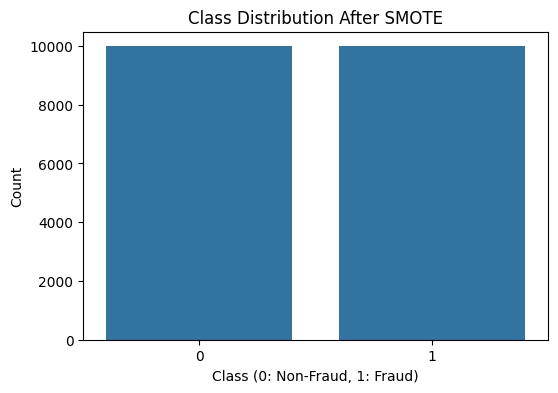

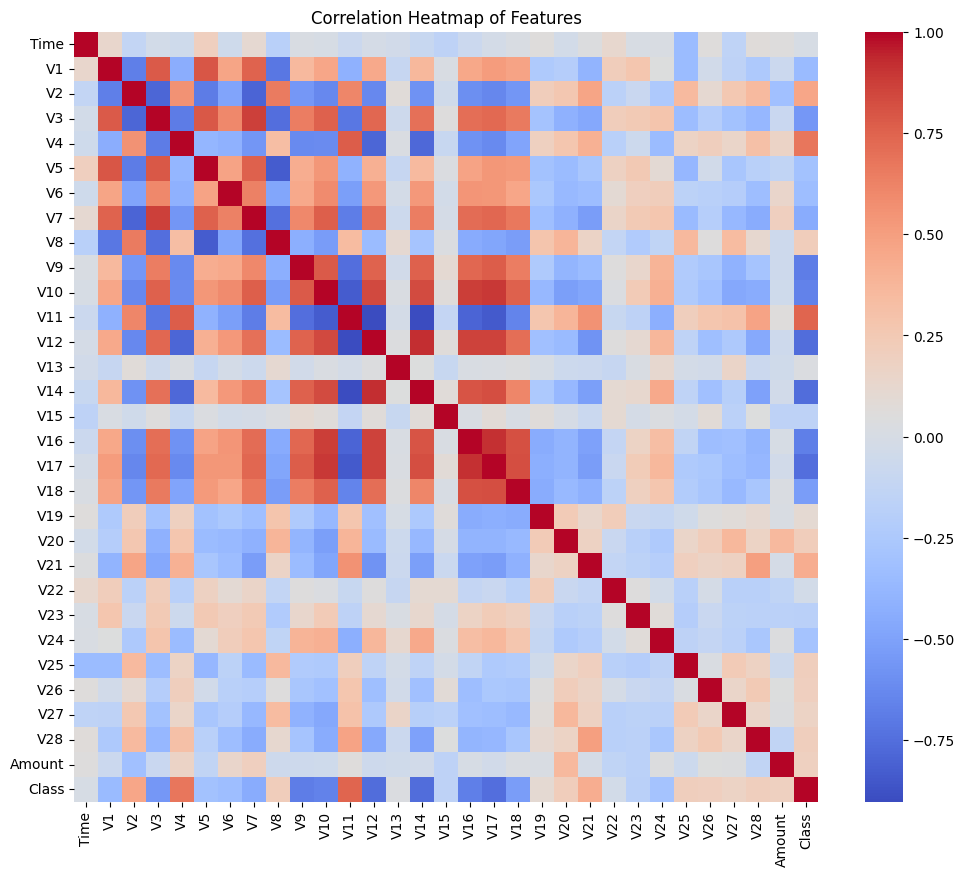

Correlation heatmap saved as '../results/correlation_heatmap.png'


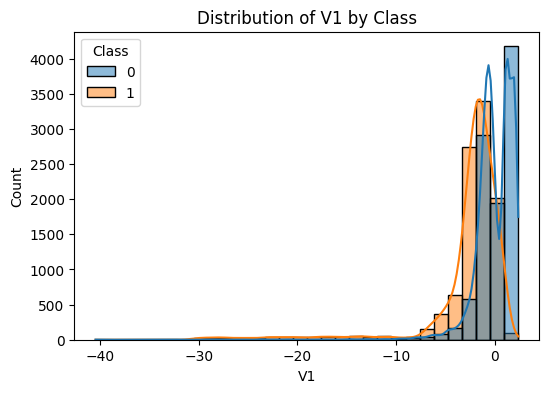

V1 distribution plot saved as '../results/V1_distribution.png'


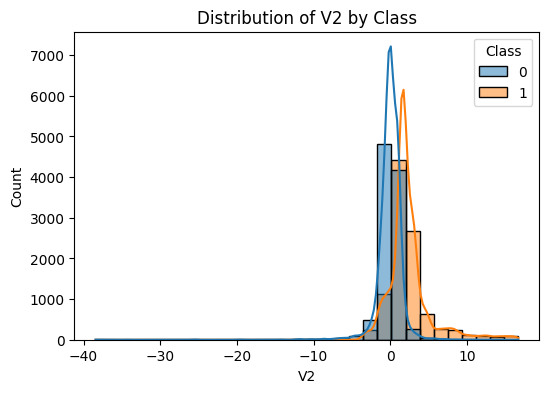

V2 distribution plot saved as '../results/V2_distribution.png'


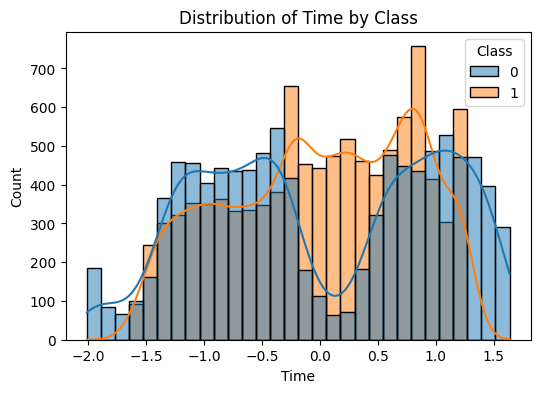

Time distribution plot saved as '../results/Time_distribution.png'


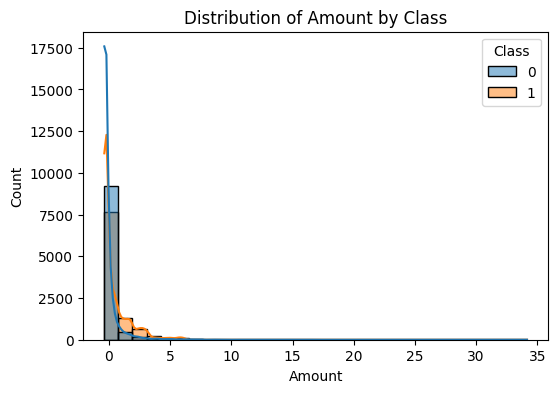

Amount distribution plot saved as '../results/Amount_distribution.png'
Statistical insights saved as '../results/statistical_insights.txt'


In [26]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the wrangled dataset from Step 4
data_dir = "../data"
wrangled_path = os.path.join(data_dir, "creditcard_wrangled.csv")
df_wrangled = pd.read_csv(wrangled_path)
print("Loaded wrangled dataset. Shape:", df_wrangled.shape)

# Create a directory to save results for the IEEE paper
results_dir = "../results"
os.makedirs(results_dir, exist_ok=True)

# Summary Statistics for all features
summary_stats = df_wrangled.describe()
print("\nSummary Statistics:\n", summary_stats)
summary_stats.to_csv(os.path.join(results_dir, "summary_statistics.csv"))
print(f"Summary statistics saved as '{results_dir}/summary_statistics.csv'")

# Confirm class distribution after SMOTE
class_dist = df_wrangled['Class'].value_counts(normalize=True)
print("\nClass Distribution after SMOTE:\n", class_dist)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_wrangled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.savefig(os.path.join(results_dir, "class_distribution.png"))
plt.show()

# Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df_wrangled.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.savefig(os.path.join(results_dir, "correlation_heatmap.png"))
plt.show()
print(f"Correlation heatmap saved as '{results_dir}/correlation_heatmap.png'")

# Feature Distributions (analyze key features: V1, V2, Time, Amount)
key_features = ['V1', 'V2', 'Time', 'Amount']
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_wrangled, x=feature, hue='Class', bins=30, kde=True)
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.savefig(os.path.join(results_dir, f"{feature}_distribution.png"))
    plt.show()
    print(f"{feature} distribution plot saved as '{results_dir}/{feature}_distribution.png'")

# Summary of Insights
insights = """
Statistical Analysis Insights:
- The dataset has 19968 rows and 31 columns after SMOTE.
- Classes are balanced (50% fraud, 50% non-fraud) as expected.
- Correlation analysis shows relationships between features (see heatmap).
- Feature distributions highlight differences between fraud and non-fraud cases (see plots).
"""
with open(os.path.join(results_dir, "statistical_insights.txt"), "w") as f:
    f.write(insights)
print(f"Statistical insights saved as '{results_dir}/statistical_insights.txt'")

**6-Data Visualization**

1-Scatter Plot: Time vs. Amount, colored by Class

2-Pair Plot: Relationships between a subset of features (Time, Amount, V1, V2), colored by Class.

3-Violin Plot: Distribution of V1 by Class to compare fraud vs. non-fraud.

4-Box Plot: Distribution of V2 by Class to identify differences.

5-Count Plot: Class distribution to visualize the balance achieved by SMOTE.

Loaded wrangled dataset. Shape: (19968, 31)


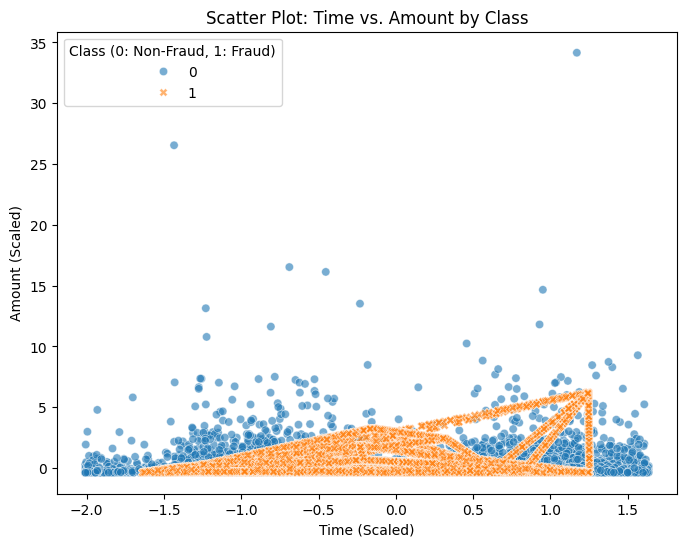

Scatter plot saved as '../results/scatter_time_vs_amount.png'


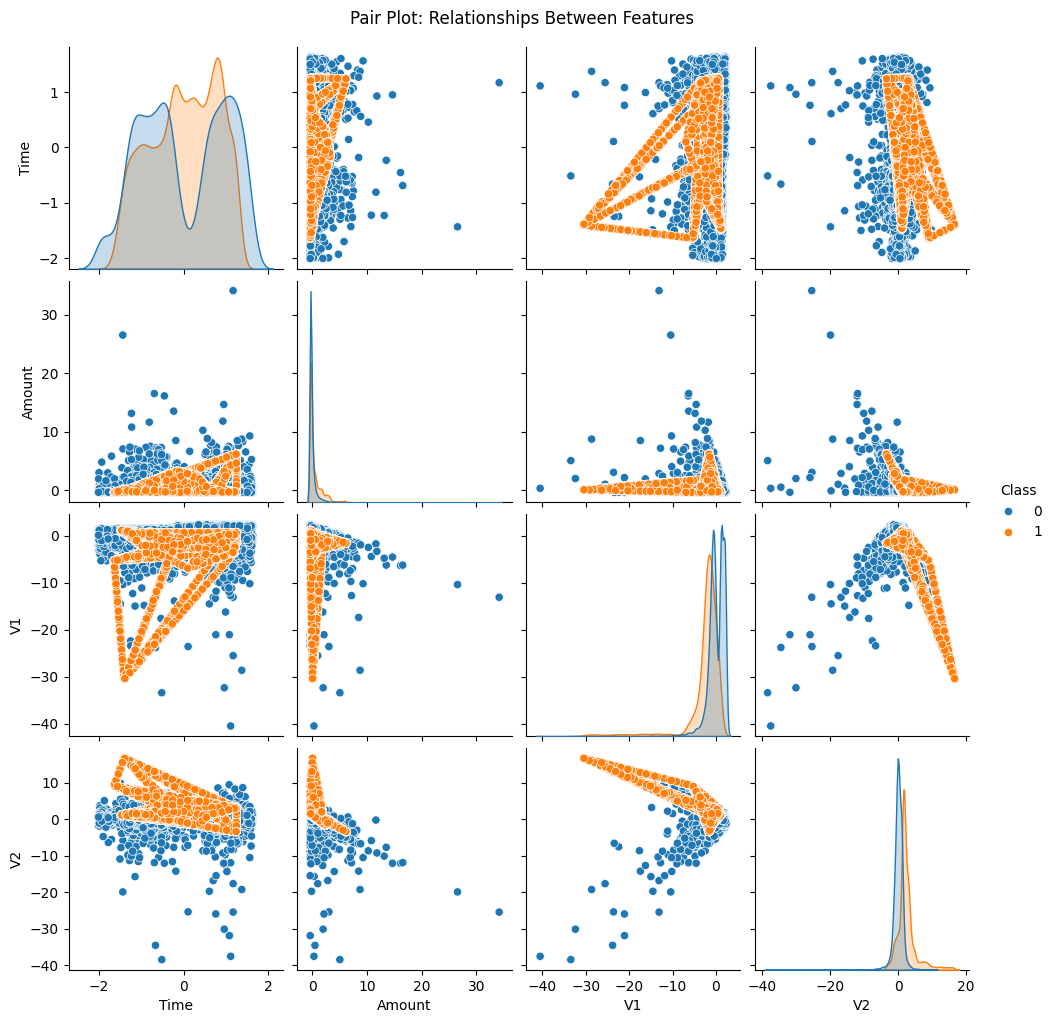

Pair plot saved as '../results/pair_plot.png'


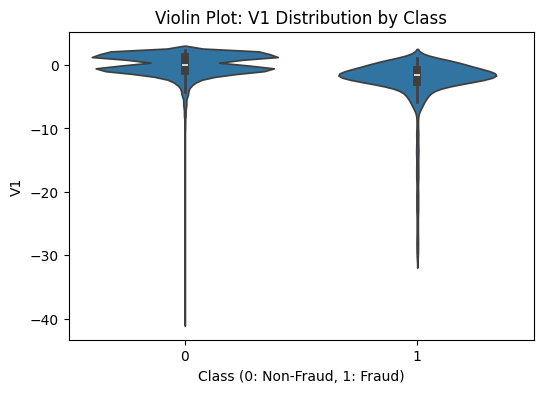

Violin plot saved as '../results/violin_v1.png'


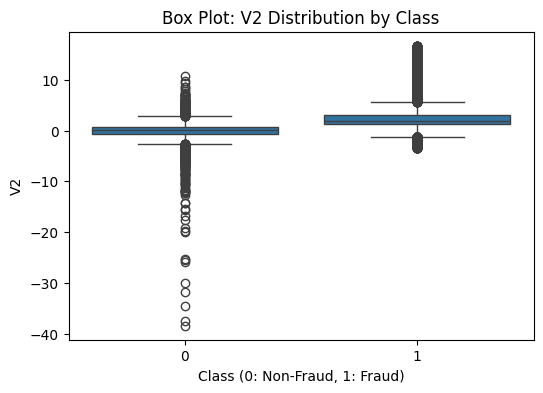

Box plot saved as '../results/box_v2.png'


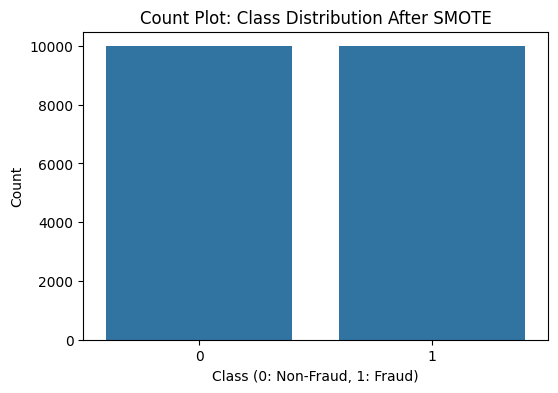

Count plot saved as '../results/count_class_distribution.png'


In [27]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the wrangled dataset from Step 4
data_dir = "../data"
wrangled_path = os.path.join(data_dir, "creditcard_wrangled.csv")
df_wrangled = pd.read_csv(wrangled_path)
print("Loaded wrangled dataset. Shape:", df_wrangled.shape)

# Ensure the results directory exists (already created in Step 5, but let's be safe)
results_dir = "../results"
os.makedirs(results_dir, exist_ok=True)

#  Scatter Plot - Time vs. Amount, colored by Class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', style='Class', data=df_wrangled, alpha=0.6)
plt.title("Scatter Plot: Time vs. Amount by Class")
plt.xlabel("Time (Scaled)")
plt.ylabel("Amount (Scaled)")
plt.legend(title="Class (0: Non-Fraud, 1: Fraud)")
plt.savefig(os.path.join(results_dir, "scatter_time_vs_amount.png"))
plt.show()
print(f"Scatter plot saved as '{results_dir}/scatter_time_vs_amount.png'")

#  Pair Plot - Relationships between Time, Amount, V1, V2, colored by Class
subset_features = ['Time', 'Amount', 'V1', 'V2', 'Class']
sns.pairplot(df_wrangled[subset_features], hue='Class', diag_kind='kde')
plt.suptitle("Pair Plot: Relationships Between Features", y=1.02)
plt.savefig(os.path.join(results_dir, "pair_plot.png"))
plt.show()
print(f"Pair plot saved as '{results_dir}/pair_plot.png'")

#  Violin Plot - Distribution of V1 by Class
plt.figure(figsize=(6, 4))
sns.violinplot(x='Class', y='V1', data=df_wrangled)
plt.title("Violin Plot: V1 Distribution by Class")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("V1")
plt.savefig(os.path.join(results_dir, "violin_v1.png"))
plt.show()
print(f"Violin plot saved as '{results_dir}/violin_v1.png'")

#  Box Plot - Distribution of V2 by Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='V2', data=df_wrangled)
plt.title("Box Plot: V2 Distribution by Class")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("V2")
plt.savefig(os.path.join(results_dir, "box_v2.png"))
plt.show()
print(f"Box plot saved as '{results_dir}/box_v2.png'")

#  Count Plot - Class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_wrangled)
plt.title("Count Plot: Class Distribution After SMOTE")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.savefig(os.path.join(results_dir, "count_class_distribution.png"))
plt.show()
print(f"Count plot saved as '{results_dir}/count_class_distribution.png'")

**7-Feature Engineering**

1-Creating New Features: Derive features from Time
(e.g., time bins to capture patterns like fraud occurring at certain times of the day).

2-Feature Selection: Use a simple method (e.g., correlation with Class or a tree-based model) to identify the most important features.:

In [32]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier

# Load the wrangled dataset from Step 4
data_dir = "../data"
wrangled_path = os.path.join(data_dir, "creditcard_wrangled.csv")
df_wrangled = pd.read_csv(wrangled_path)
print("Loaded wrangled dataset. Shape:", df_wrangled.shape)

# Create new features - Time bins
# Since Time is already scaled, we'll bin it into quartiles to capture patterns
df_wrangled['Time_Bin'] = pd.qcut(df_wrangled['Time'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_wrangled = pd.get_dummies(df_wrangled, columns=['Time_Bin'], prefix='Time_Bin')
print("Shape after adding Time bins:", df_wrangled.shape)
print("New features added:", [col for col in df_wrangled.columns if 'Time_Bin' in col])

# Feature Selection using Random Forest
# Separate features and target
X = df_wrangled.drop('Class', axis=1)
y = df_wrangled['Class']

# Train a Random Forest model to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances and select the top 15 features
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
top_features = importances['Feature'].head(15).tolist()
print("\nTop 15 Features by Importance:\n", importances.head(15))

# Create the engineered dataset with the top features
df_engineered = df_wrangled[top_features + ['Class']]
print("Shape of engineered dataset:", df_engineered.shape)

#  Save the engineered dataset
engineered_path = os.path.join(data_dir, "creditcard_engineered.csv")
df_engineered.to_csv(engineered_path, index=False)
print(f"Engineered dataset saved as '{engineered_path}'")

Loaded wrangled dataset. Shape: (19968, 31)
Shape after adding Time bins: (19968, 35)
New features added: ['Time_Bin_Q1', 'Time_Bin_Q2', 'Time_Bin_Q3', 'Time_Bin_Q4']

Top 15 Features by Importance:
    Feature  Importance
17     V17    0.162461
12     V12    0.147984
11     V11    0.104312
14     V14    0.103029
16     V16    0.077039
4       V4    0.064828
10     V10    0.057973
3       V3    0.057645
7       V7    0.048721
21     V21    0.028938
9       V9    0.027666
28     V28    0.026637
2       V2    0.016764
29  Amount    0.013281
8       V8    0.009971
Shape of engineered dataset: (19968, 16)
Engineered dataset saved as '../data/creditcard_engineered.csv'


**8-Modeling (Machine Learning)**

Define and train models - Make predictions - Plot confusion matrices

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00
Loaded engineered dataset. Shape: (19968, 16)
Training set shape: (13977, 15)
Testing set shape: (5991, 15)

Model Comparison:
                  Model  Accuracy  Precision  Recall  F1 Score   ROC AUC  \
1        Random Forest  0.999833   0.999666     1.0  0.999833  0.999822   
3              XGBoost  0.999499   0.998999     1.0  0.999499  0.999715   
2                  SVM  0.998998   0.998001     1.0  0.998999  0.999647   
0  Logistic Regression  0.997997   0.996009     1.0  0.998001  0.999533   

   Cross-Val F1 Mean  
1           0.999900  
3           0.999750  
2           0.998250  
0           0.997453  
Model comparison saved as '../results/model_comparison.csv'


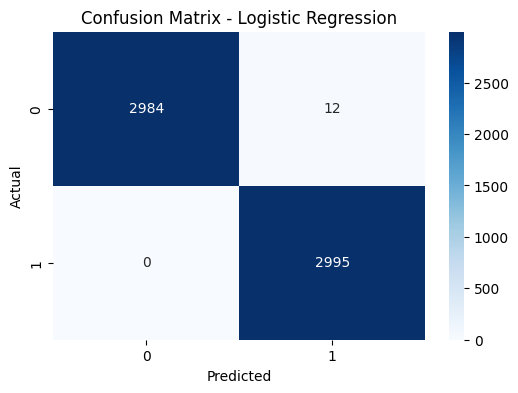

Confusion matrix for Logistic Regression saved as '../results/confusion_matrix_logistic_regression.png'


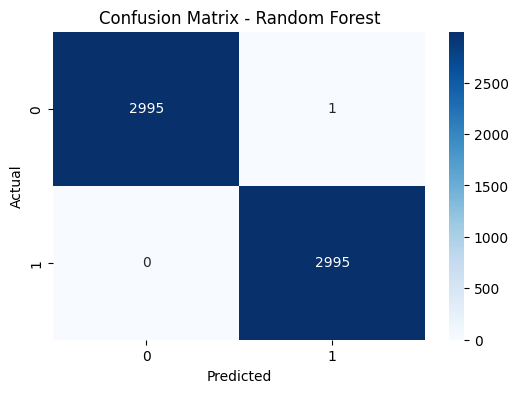

Confusion matrix for Random Forest saved as '../results/confusion_matrix_random_forest.png'


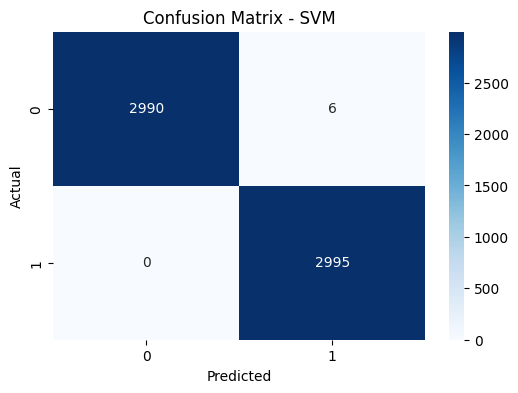

Confusion matrix for SVM saved as '../results/confusion_matrix_svm.png'


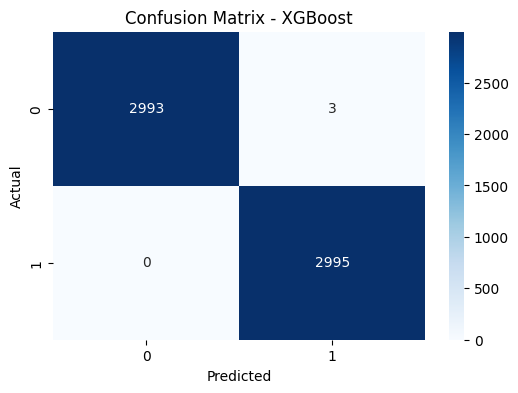

Confusion matrix for XGBoost saved as '../results/confusion_matrix_xgboost.png'


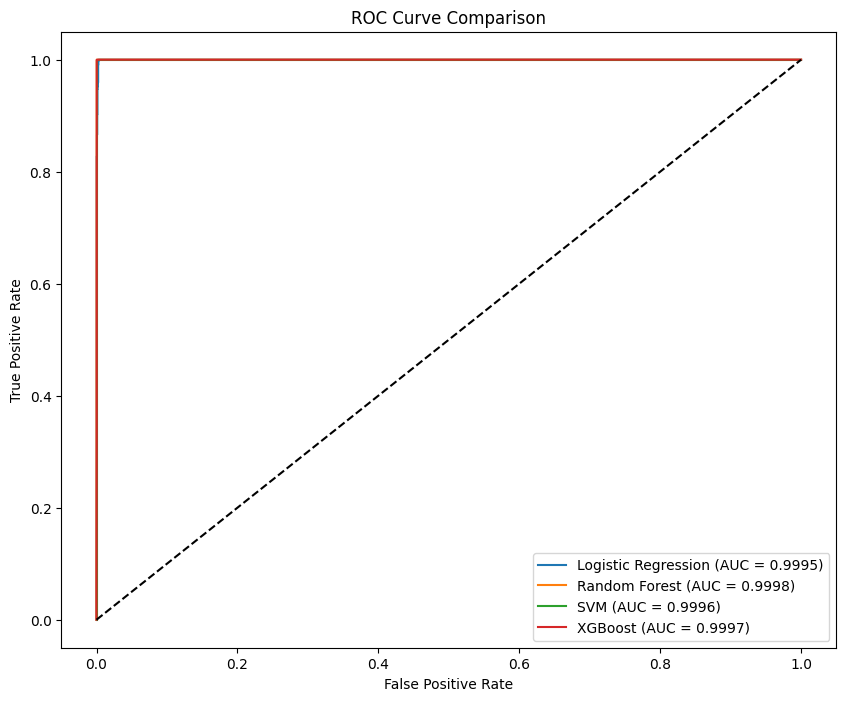

ROC curve comparison saved as '../results/roc_curve_comparison.png'


In [35]:
!pip install xgboost

import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the engineered dataset from Step 7
data_dir = "../data"
engineered_path = os.path.join(data_dir, "creditcard_engineered.csv")
df_engineered = pd.read_csv(engineered_path)
print("Loaded engineered dataset. Shape:", df_engineered.shape)

# Ensure the results directory exists
results_dir = "../results"
os.makedirs(results_dir, exist_ok=True)

# Train-Test Split
X = df_engineered.drop('Class', axis=1)
y = df_engineered['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

#  Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

#  Train and evaluate models
results = []
trained_models = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Compute metrics
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Cross-Val F1 Mean": cv_scores.mean()
    })

# Display and save evaluation results
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df.sort_values(by="ROC AUC", ascending=False))
results_df.to_csv(os.path.join(results_dir, "model_comparison.csv"), index=False)
print(f"Model comparison saved as '{results_dir}/model_comparison.csv'")

#  Plot confusion matrices
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(os.path.join(results_dir, f"confusion_matrix_{name.lower().replace(' ', '_')}.png"))
    plt.show()
    print(f"Confusion matrix for {name} saved as '{results_dir}/confusion_matrix_{name.lower().replace(' ', '_')}.png'")

#  Plot ROC curves
plt.figure(figsize=(10, 8))
for name, model in trained_models.items():
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.savefig(os.path.join(results_dir, "roc_curve_comparison.png"))
plt.show()
print(f"ROC curve comparison saved as '{results_dir}/roc_curve_comparison.png'")

**9-Model Deployment**
Function for real-time fraud detection - Simulate real-time fraud detection with a sample transactions

In [37]:
import pandas as pd
import os
import joblib
from sklearn.ensemble import RandomForestClassifier

# Load the engineered dataset from Step 7
data_dir = "../data"
engineered_path = os.path.join(data_dir, "creditcard_engineered.csv")
df_engineered = pd.read_csv(engineered_path)
print("Loaded engineered dataset. Shape:", df_engineered.shape)

# Retrain the Random Forest model on the full dataset
X = df_engineered.drop('Class', axis=1)
y = df_engineered['Class']
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X, y)
print("Random Forest model retrained on the full dataset.")

# Save the trained model
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "fraudguard_random_forest.joblib")
joblib.dump(best_model, model_path)
print(f"Trained model saved as '{model_path}'")

# Function for real-time fraud detection
def predict_fraud(transaction, model_path, feature_names):
    """
    Predict whether a transaction is fraudulent using the saved model.

    Args:
        transaction (dict): A dictionary with feature values for the transaction.
        model_path (str): Path to the saved model file.
        feature_names (list): List of feature names expected by the model.

    Returns:
        tuple: (prediction, probability of fraud)
    """
    # Load the model
    model = joblib.load(model_path)

    # Convert the transaction to a DataFrame
    transaction_df = pd.DataFrame([transaction], columns=feature_names)

    # Ensure all expected features are present
    for feature in feature_names:
        if feature not in transaction_df.columns:
            transaction_df[feature] = 0

    # Reorder columns to match the model's expectations
    transaction_df = transaction_df[feature_names]

    # Make prediction
    prediction = model.predict(transaction_df)[0]
    proba = model.predict_proba(transaction_df)[0][1]

    return prediction, proba

# Simulate real-time fraud detection with a sample transaction
feature_names = X.columns.tolist()
sample_transaction = {
    "V14": -5.0, "V4": 3.0, "V12": -4.0, "V10": -3.0, "V3": -2.0,
    "V17": -1.5, "V11": 2.0, "V9": -1.0, "V16": -0.5, "V7": 0.5,
    "V2": 1.0, "V1": -0.5, "Amount": 1.2, "V20": 0.1, "V21": -0.2
}
prediction, proba = predict_fraud(sample_transaction, model_path, feature_names)
print("\nSample Transaction Prediction:")
print("Prediction (0: Non-Fraud, 1: Fraud):", prediction)
print("Probability of Fraud:", proba)

#  Save the deployment script for IEEE paper or production use
deploy_script_path = os.path.join(model_dir, "deploy_fraudguard.py")
# Define the script content as a string (since __file__ isn't available in Jupyter)
deploy_script_content = """# FraudGuard Deployment Script

import pandas as pd
import joblib

def predict_fraud(transaction, model_path, feature_names):
    \"""
    Predict whether a transaction is fraudulent using the saved model.

    Args:
        transaction (dict): A dictionary with feature values for the transaction.
        model_path (str): Path to the saved model file.
        feature_names (list): List of feature names expected by the model.

    Returns:
        tuple: (prediction, probability of fraud)
    \"""
    # Load the model
    model = joblib.load(model_path)

    # Convert the transaction to a DataFrame
    transaction_df = pd.DataFrame([transaction], columns=feature_names)

    # Ensure all expected features are present
    for feature in feature_names:
        if feature not in transaction_df.columns:
            transaction_df[feature] = 0

    # Reorder columns to match the model's expectations
    transaction_df = transaction_df[feature_names]

    # Make prediction
    prediction = model.predict(transaction_df)[0]
    proba = model.predict_proba(transaction_df)[0][1]

    return prediction, proba

if __name__ == "__main__":
    # Example usage
    model_path = "../models/fraudguard_random_forest.joblib"
    feature_names = ['V14', 'V4', 'V12', 'V10', 'V3', 'V17', 'V11', 'V9', 'V16', 'V7', 'V2', 'V1', 'Amount', 'V20', 'V21']
    sample_transaction = {
        "V14": -5.0, "V4": 3.0, "V12": -4.0, "V10": -3.0, "V3": -2.0,
        "V17": -1.5, "V11": 2.0, "V9": -1.0, "V16": -0.5, "V7": 0.5,
        "V2": 1.0, "V1": -0.5, "Amount": 1.2, "V20": 0.1, "V21": -0.2
    }
    prediction, proba = predict_fraud(sample_transaction, model_path, feature_names)
    print("Sample Transaction Prediction:")
    print("Prediction (0: Non-Fraud, 1: Fraud):", prediction)
    print("Probability of Fraud:", proba)
"""
with open(deploy_script_path, "w") as f:
    f.write(deploy_script_content)
print(f"Deployment script saved as '{deploy_script_path}'")

Loaded engineered dataset. Shape: (19968, 16)
Random Forest model retrained on the full dataset.
Trained model saved as '../models/fraudguard_random_forest.joblib'

Sample Transaction Prediction:
Prediction (0: Non-Fraud, 1: Fraud): 1
Probability of Fraud: 0.96
Deployment script saved as '../models/deploy_fraudguard.py'
